🎮 ESports Earnings Dataset - Exploratory Data Analysis (EDA)

📌 Objective
This project analyzes the ESports Earnings dataset to understand:
- Which games earn the most prize money
- Which genres dominate ESports earnings
- Relationship between earnings, number of players, and tournaments
- Country-wise earning contributions
- Trend of earnings based on game release year

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("ESport_Earnings.csv", encoding="utf-8", encoding_errors="ignore")
df

,IdNo,TotalMoney,GameName,Genre,PlayerNo,TournamentNo,Top_Country,Top_Country_Earnings,Releaseyear
0,613,310.00,Acceleration of SUGURI 2,Fighting Game,6,2,United States,310.00,2018
1,510,190075.61,Age of Empires,Strategy,246,95,Viet Nam,123408.43,1997
2,179,1492489.51,Age of Empires II,Strategy,956,576,China,174252.44,1999
3,177,68113.85,Age of Empires III,Strategy,106,76,United States,18523.52,2005
4,540,2668.00,Age of Empires Online,Strategy,16,7,Germany,1264.00,2011
...,...,...,...,...,...,...,...,...,...
499,165,4957837.61,World of WarCraft,Role-Playing Game,413,118,United States,1416887.48,2004
500,623,50000.00,WWE 2K20,Fighting Game,20,2,United States,43500.00,2019
501,376,5489.65,Xonotic,First-Person Shooter,133,25,Netherlands,1881.44,2010
502,520,48746.72,Yu-Gi-Oh! Duel Links,Collectible Card Game,328,219,United States,19983.28,2016


In [10]:
df.describe()

,IdNo,TotalMoney,PlayerNo,TournamentNo,Top_Country_Earnings,Releaseyear
count,504.000000,5.040000e+02,504.000000,504.00000,5.040000e+02,504.000000
mean,440.972222,1.744743e+06,186.668651,80.72619,6.010823e+05,2006.982143
std,163.464867,1.269146e+07,795.794735,412.46406,3.751800e+06,89.354220
min,151.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,11.000000
25%,276.750000,1.375202e+03,4.000000,1.00000,3.913000e+02,2006.000000
50%,454.500000,3.600856e+04,20.000000,5.00000,1.711679e+04,2013.000000
75%,580.250000,2.057516e+05,86.000000,25.25000,1.036039e+05,2017.000000
max,706.000000,2.274199e+08,13032.000000,5909.00000,6.506061e+07,2020.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IdNo                  504 non-null    int64  
 1   TotalMoney            504 non-null    float64
 2   GameName              504 non-null    object 
 3   Genre                 504 non-null    object 
 4   PlayerNo              504 non-null    int64  
 5   TournamentNo          504 non-null    int64  
 6   Top_Country           456 non-null    object 
 7   Top_Country_Earnings  504 non-null    float64
 8   Releaseyear           504 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 35.6+ KB


In [ ]:
df.isnull().sum()

In [53]:
df["Top_Country"] = df["Top_Country"].fillna("Unknown")

In [54]:
df.isnull().sum()

IdNo                    0
TotalMoney              0
GameName                0
Genre                   0
PlayerNo                0
TournamentNo            0
Top_Country             0
Top_Country_Earnings    0
Releaseyear             0
dtype: int64

In [55]:
print(df.isnull().sum().sum())

0


In [56]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
499    False
500    False
501    False
502    False
503    False
Length: 504, dtype: bool

In [57]:
print(df.duplicated().sum())

0


In [58]:
print(df["IdNo"].duplicated().sum())

0


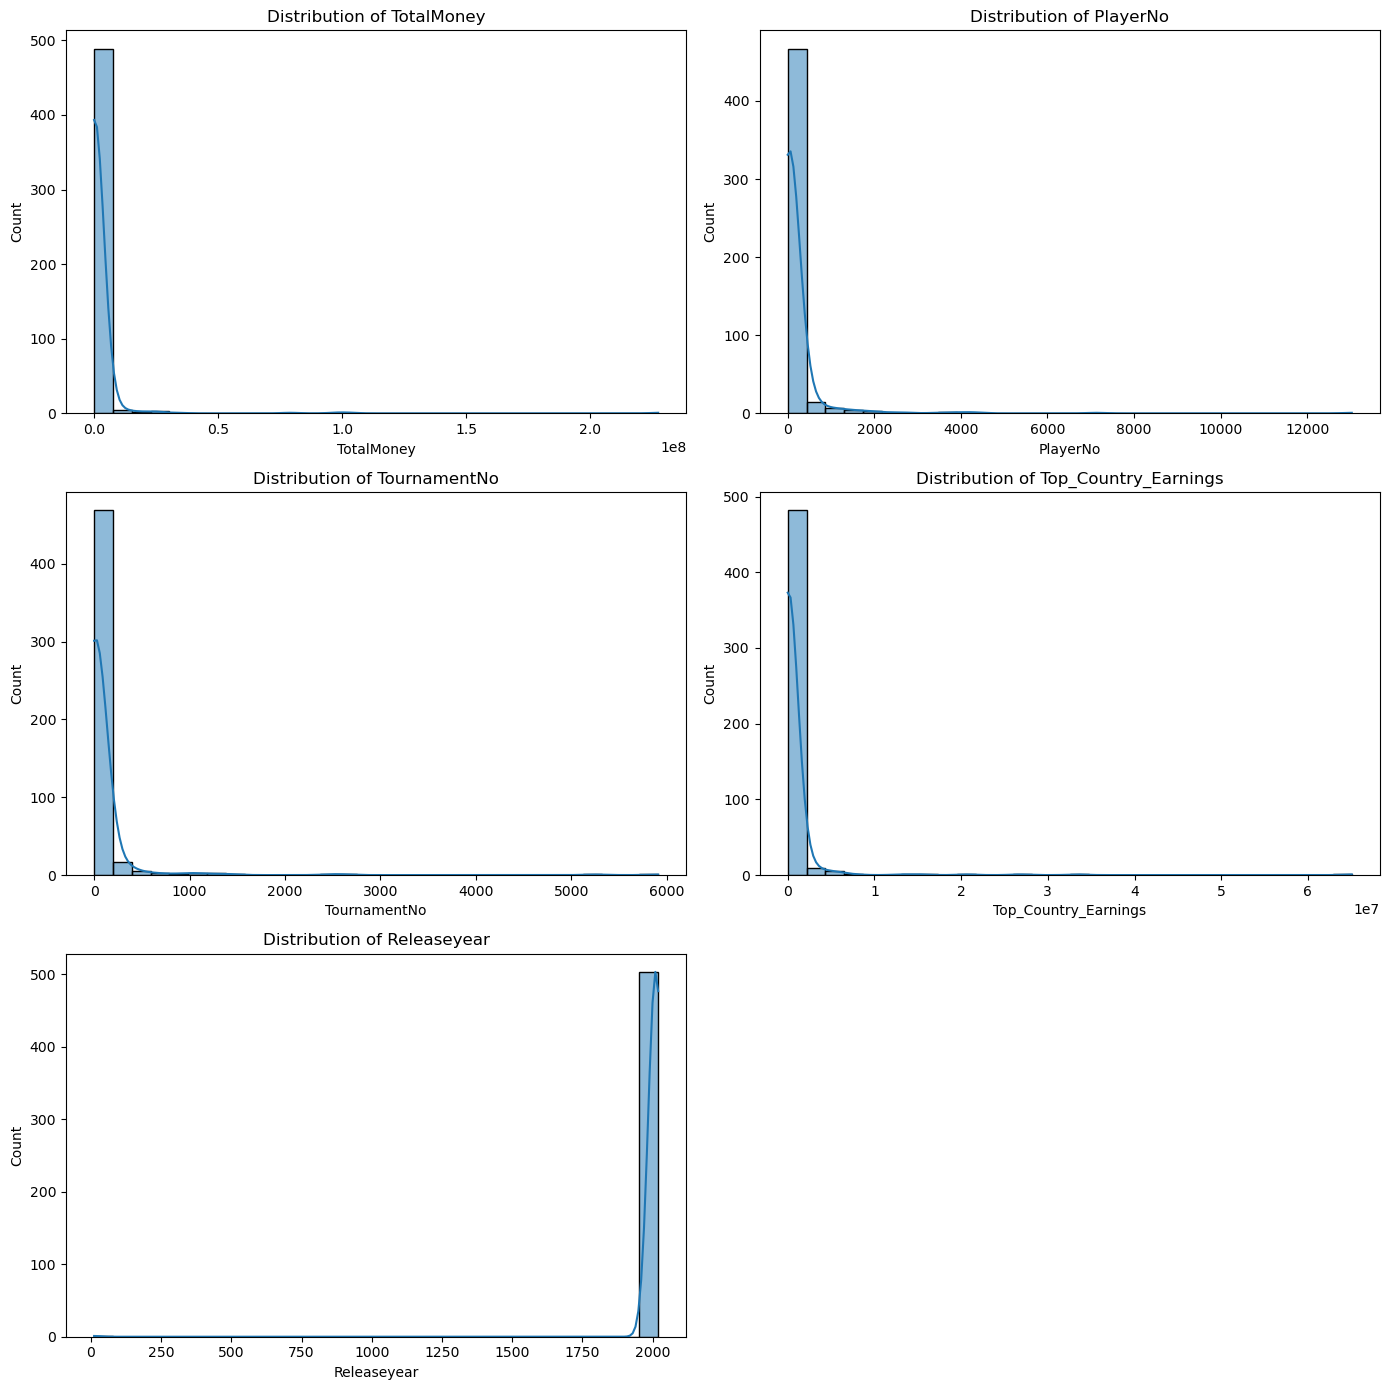

In [24]:
num_cols = ["TotalMoney", "PlayerNo", "TournamentNo", "Top_Country_Earnings", "Releaseyear"]

plt.figure(figsize=(14,14))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


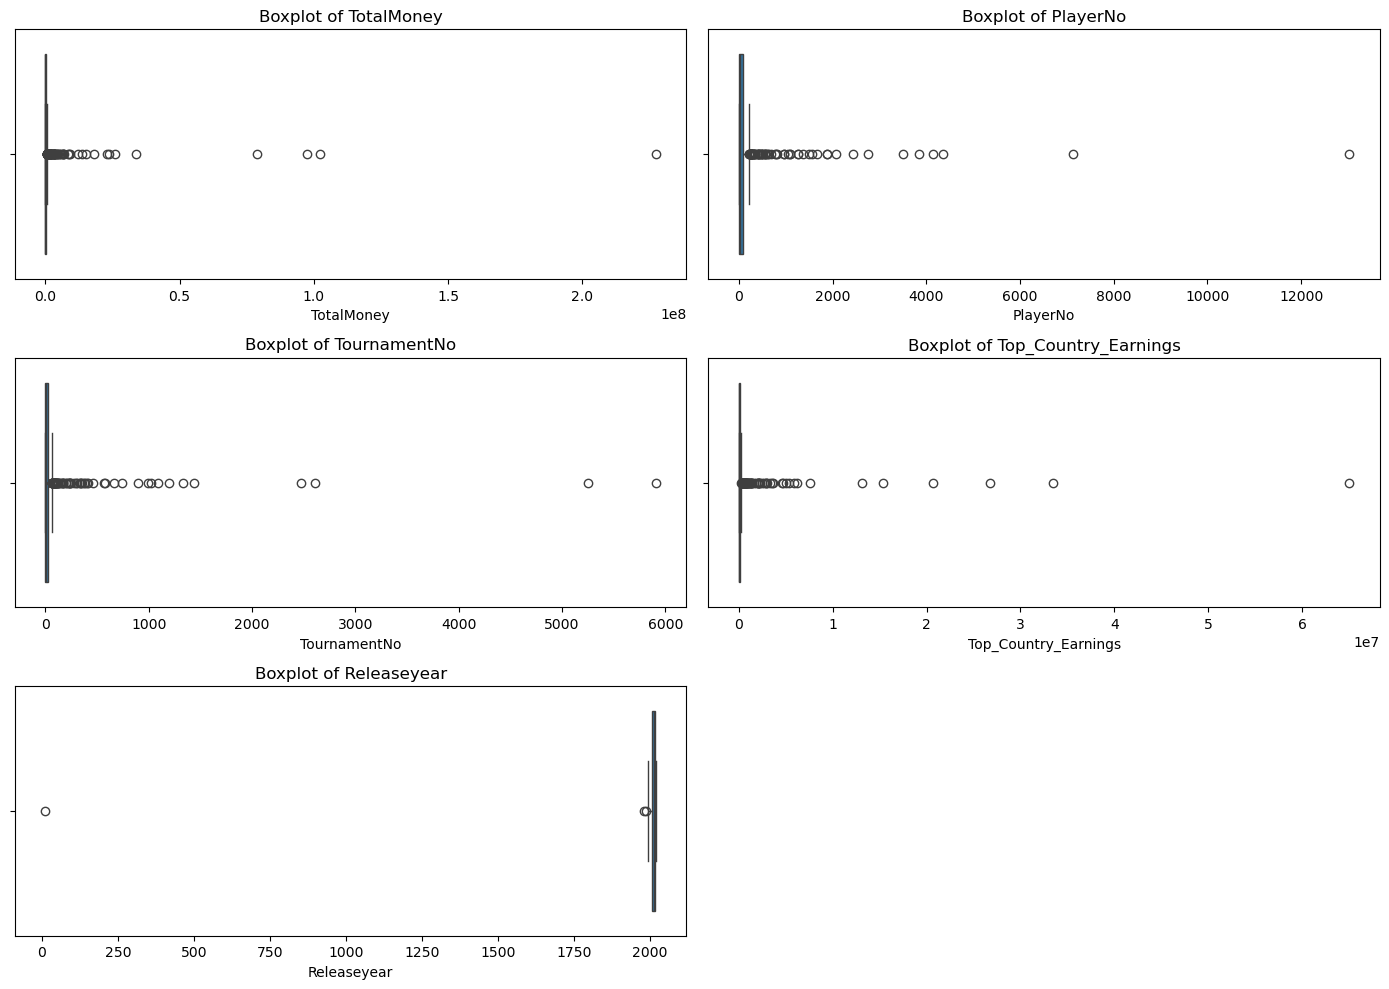

In [25]:
plt.figure(figsize=(14,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


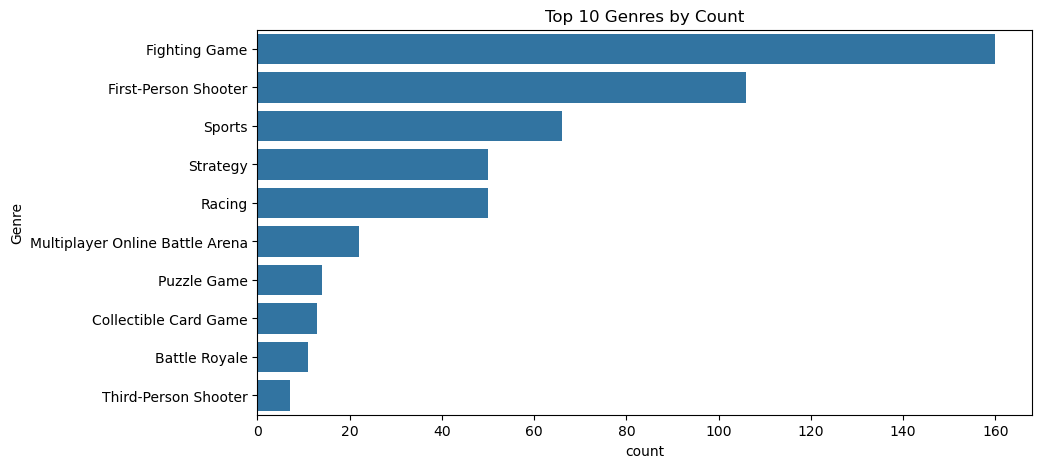

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(y="Genre", data=df, order=df["Genre"].value_counts().head(10).index)
plt.title("Top 10 Genres by Count")
plt.show()

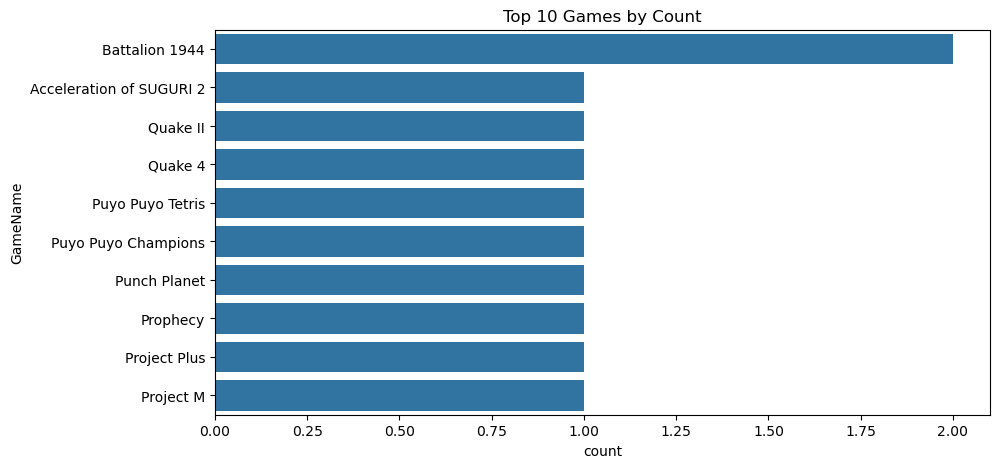

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(y="GameName", data=df, order=df["GameName"].value_counts().head(10).index)
plt.title("Top 10 Games by Count")
plt.show()


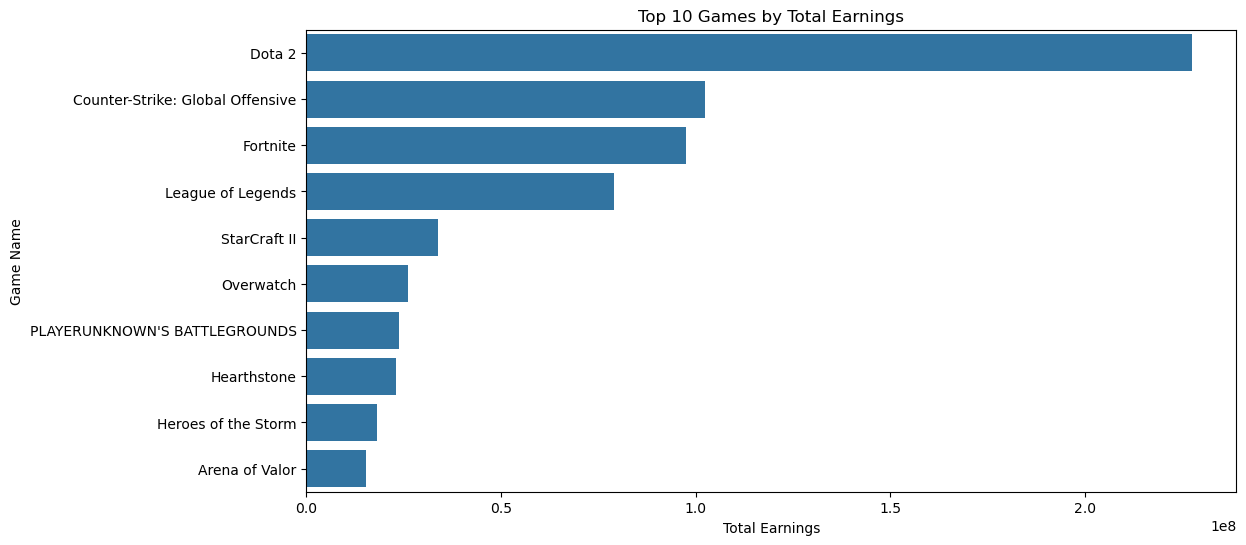

In [28]:
top10_games = df.groupby("GameName")["TotalMoney"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top10_games.values, y=top10_games.index)
plt.title("Top 10 Games by Total Earnings")
plt.xlabel("Total Earnings")
plt.ylabel("Game Name")
plt.show()


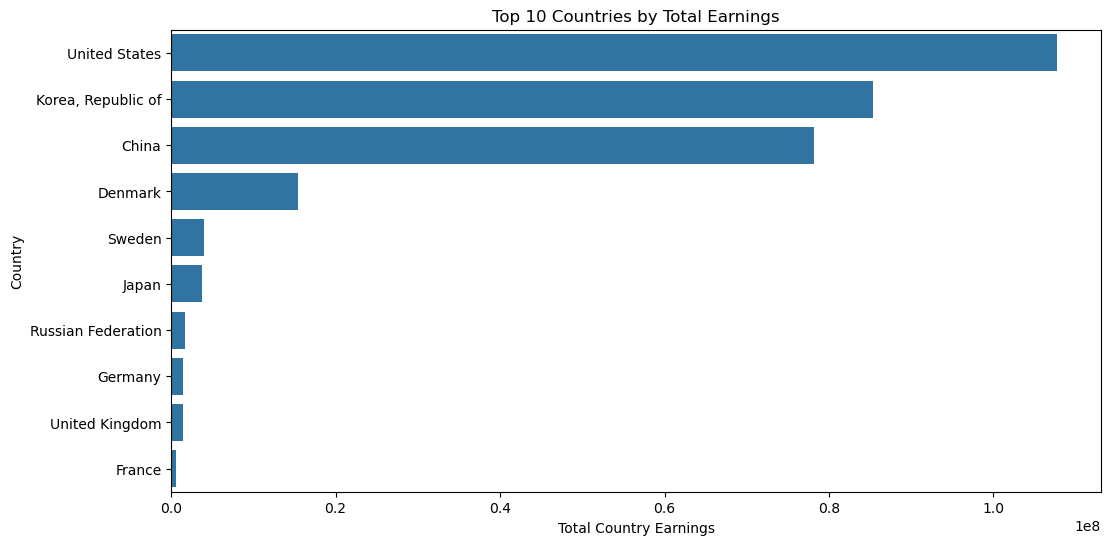

In [29]:
top10_countries = df.groupby("Top_Country")["Top_Country_Earnings"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top10_countries.values, y=top10_countries.index)
plt.title("Top 10 Countries by Total Earnings")
plt.xlabel("Total Country Earnings")
plt.ylabel("Country")
plt.show()


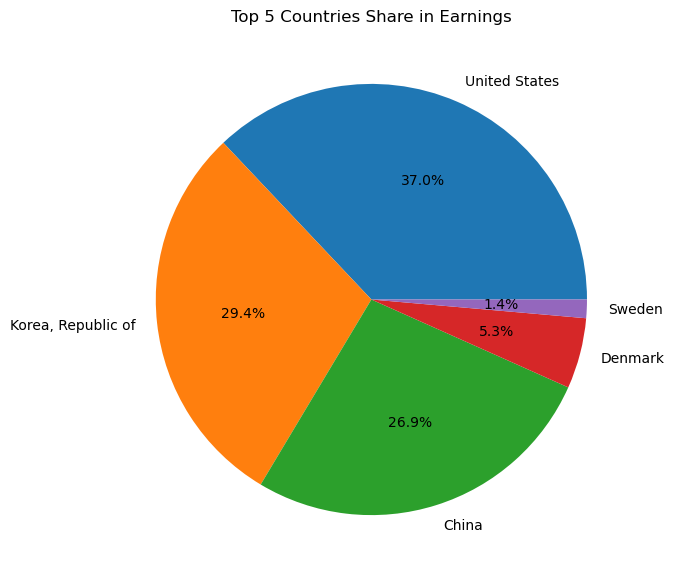

In [30]:
top5_country_share = df.groupby("Top_Country")["Top_Country_Earnings"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(7,7))
plt.pie(top5_country_share.values, labels=top5_country_share.index, autopct="%1.1f%%")
plt.title("Top 5 Countries Share in Earnings")
plt.show()


In [31]:
df["Year_Bin"] = pd.cut(df["Releaseyear"], bins=[1990,2000,2010,2020,2030], 
                        labels=["1990-2000","2000-2010","2010-2020","2020-2030"])


C:\Users\Hp\AppData\Local\Temp\ipykernel_19296\3044923095.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  genre_year = df.pivot_table(values="TotalMoney", index="Genre", columns="Year_Bin", aggfunc="sum").fillna(0)


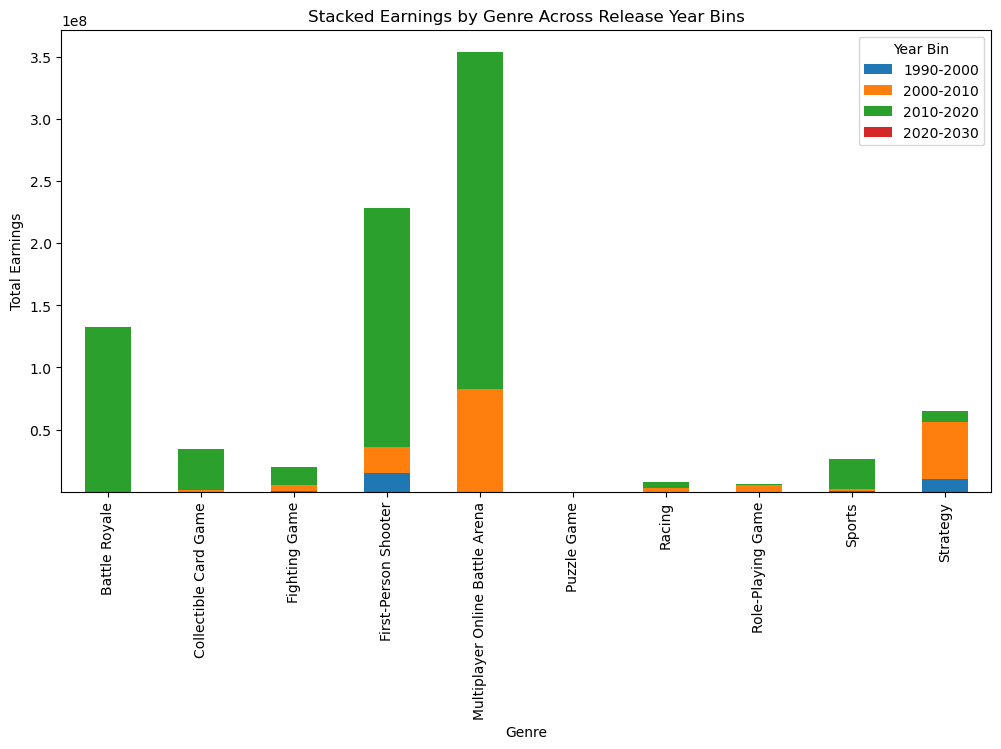

In [32]:
genre_year = df.pivot_table(values="TotalMoney", index="Genre", columns="Year_Bin", aggfunc="sum").fillna(0)

genre_year.head(10).plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Stacked Earnings by Genre Across Release Year Bins")
plt.xlabel("Genre")
plt.ylabel("Total Earnings")
plt.legend(title="Year Bin")
plt.show()


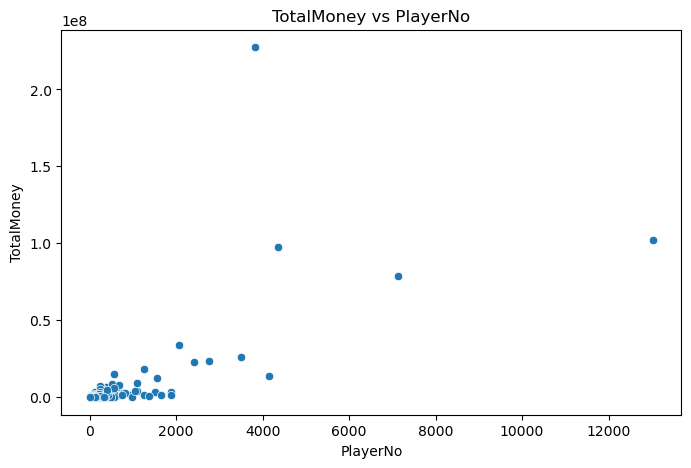

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="PlayerNo", y="TotalMoney", data=df)
plt.title("TotalMoney vs PlayerNo")
plt.show()


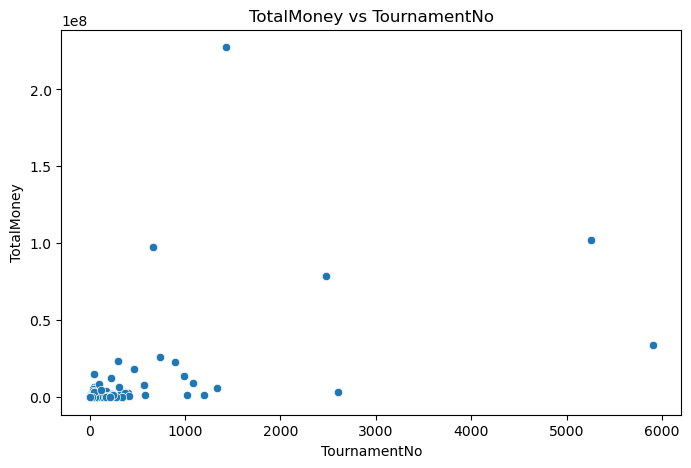

In [34]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="TournamentNo", y="TotalMoney", data=df)
plt.title("TotalMoney vs TournamentNo")
plt.show()


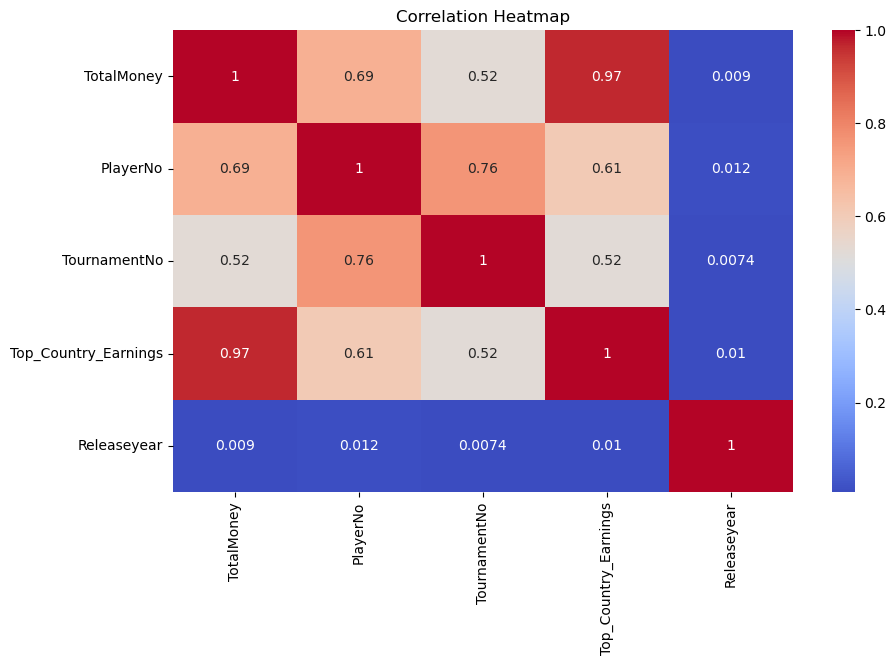

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [36]:
df["Earnings_per_Player"] = df["TotalMoney"] / df["PlayerNo"]
df["Earnings_per_Tournament"] = df["TotalMoney"] / df["TournamentNo"]


In [40]:
df.sort_values("Earnings_per_Player", ascending=False).head(10)


,IdNo,TotalMoney,GameName,Genre,PlayerNo,TournamentNo,Top_Country,Top_Country_Earnings,Releaseyear,Year_Bin,Earnings_per_Player,Earnings_per_Tournament
430,397,1290.01,Supreme Commander: Forged Alliance,Strategy,0,1,NaN,0.0,2007,2000-2010,inf,1290.010
279,350,7679.25,NASCAR Thunder 2002,Racing,0,1,NaN,0.0,2001,2000-2010,inf,7679.250
429,400,4901.26,Supreme Commander,Strategy,0,1,NaN,0.0,2007,2000-2010,inf,4901.260
380,267,24000.00,Shadowrun,First-Person Shooter,0,3,NaN,0.0,2007,2000-2010,inf,8000.000
169,263,135000.00,Gears of War 2,Third-Person Shooter,0,5,NaN,0.0,2008,2000-2010,inf,27000.000
28,357,91715.22,Battlefield 2,First-Person Shooter,0,12,NaN,0.0,2005,2000-2010,inf,7642.935
260,488,143490.00,MechWarrior Online,First-Person Shooter,0,1,NaN,0.0,2013,2010-2020,inf,143490.000
235,424,472.66,Legend of Glory,Multiplayer Online Battle Arena,0,1,NaN,0.0,2015,2010-2020,inf,472.660
90,396,11340.95,Crysis,First-Person Shooter,0,2,NaN,0.0,2007,2000-2010,inf,5670.475
29,355,18546.14,Battlefield 2142,First-Person Shooter,0,4,NaN,0.0,2006,2000-2010,inf,4636.535


In [41]:
df.sort_values("Earnings_per_Tournament", ascending=False).head(10)



,IdNo,TotalMoney,GameName,Genre,PlayerNo,TournamentNo,Top_Country,Top_Country_Earnings,Releaseyear,Year_Bin,Earnings_per_Player,Earnings_per_Tournament
443,627,456721.47,TEPPEN,Strategy,12,1,"Taiwan, Republic of China",280883.69,2019,2010-2020,38060.122500,456721.470000
247,275,400000.00,Madden NFL 2013,Sports,8,1,United States,209200.00,2012,2010-2020,50000.000000,400000.000000
14,529,15228710.62,Arena of Valor,Multiplayer Online Battle Arena,558,51,China,5016882.31,2015,2010-2020,27291.596093,298602.169020
128,610,538047.38,F1 2019,Racing,25,2,Italy,133333.32,2019,2010-2020,21521.895200,269023.690000
282,538,1000000.00,NBA 2K18,Sports,91,4,United States,940633.24,2017,2010-2020,10989.010989,250000.000000
249,475,1004000.00,Madden NFL 2017,Sports,42,5,United States,1004000.00,2016,2010-2020,23904.761905,200800.000000
127,579,200000.00,F1 2018,Racing,21,1,United Kingdom,56833.33,2018,2010-2020,9523.809524,200000.000000
24,589,1076322.28,Auto Chess,Strategy,72,6,"Korea, Republic of",515267.34,2019,2010-2020,14948.920556,179387.046667
155,555,679240.00,FIFA Online 4,Sports,84,4,"Korea, Republic of",213999.96,2018,2010-2020,8086.190476,169810.000000
154,368,1434341.90,FIFA Online 3,Sports,89,9,"Korea, Republic of",621372.88,2012,2010-2020,16116.201124,159371.322222


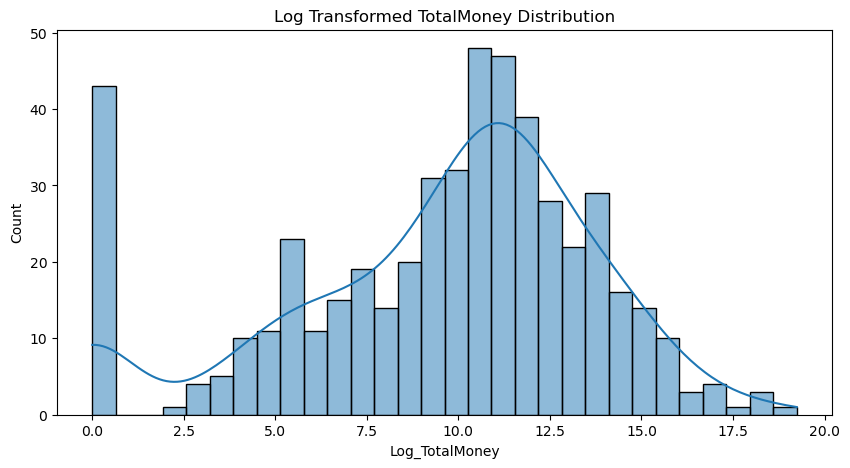

In [42]:
df["Log_TotalMoney"] = np.log1p(df["TotalMoney"])

plt.figure(figsize=(10,5))
sns.histplot(df["Log_TotalMoney"], bins=30, kde=True)
plt.title("Log Transformed TotalMoney Distribution")
plt.show()


In [43]:
print("Top 5 Earning Games:\n", top10_games.head(5))
print("\nTop 5 Earning Countries:\n", top10_countries.head(5))


Top 5 Earning Games:
 GameName
Dota 2                              2.274199e+08
Counter-Strike: Global Offensive    1.024743e+08
Fortnite                            9.750842e+07
League of Legends                   7.900345e+07
StarCraft II                        3.391406e+07
Name: TotalMoney, dtype: float64

Top 5 Earning Countries:
 Top_Country
United States         1.077186e+08
Korea, Republic of    8.540854e+07
China                 7.820683e+07
Denmark               1.540062e+07
Sweden                4.031022e+06
Name: Top_Country_Earnings, dtype: float64
